<a href="https://colab.research.google.com/github/accollier/python/blob/main/AGRESSIVE_WALLET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

## Análise Small Caps BR

In [2]:
!pip install yfinance
!pip install investpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 37.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 20.9 MB/s eta 0:00:00
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481577 sha256=f3987b2ba22e2369e6c4ce5317ed79ed154ad9adaf3de7fa2d5f3670c7ec451f
  Stored in directory: /root/.cache/pip/wheels/db/f4/ae/980b93b0257620bc8e4afc98a854a7a746a33eb8335fd07906
Successfully built investpy


In [7]:
!pip install fundamentus
!pip install requests-cache

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 4.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import yfinance as yf
import pandas as pd
import investpy as inv

In [ ]:
!pip install mplcyberpunk
!pip install python-bcb

In [8]:
import fundamentus
import requests_cache
import requests
import time, logging
import matplotlib.pyplot as plt

In [15]:
import mplcyberpunk
from bcb import currency
from bcb import sgs
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from datetime import datetime
from datetime import timedelta

In [5]:
BR = inv.stocks.get_stocks(country="Brazil")
print(BR)
BR.to_excel

    country                name                               full_name  \
0    brazil       ABC BRASIL PN                     Banco ABC Brasil SA   
1    brazil       BRASILAGRO ON                   BrasilAgro - Co ON NM   
2    brazil          RUMO ON NM  RUMO Logistica Operadora Multimodal SA   
3    brazil       ALPARGATAS ON                           Alpargatas SA   
4    brazil       ALPARGATAS PN                           Alpargatas SA   
..      ...                 ...                                     ...   
744  brazil  Integral Brei Reit     Fdo Inv Imob Fof Integral Brei Reit   
745  brazil             Vbi Cri                  Fi Imobiliario Vbi Cri   
746  brazil        Hedge Realty      Hedge Realty Devl Fdo Inv Imob Etf   
747  brazil              Rb Cap      Rb Cap Desenvolvimento Res Iii Fii   
748  brazil            Treecorp          Treecorp Real Estate Fii I Etf   

             isin currency  symbol  
0    BRABCBACNPR4      BRL   ABCB4  
1    BRAGROACNOR7      BR

<bound method NDFrame.to_excel of     country                name                               full_name  \
0    brazil       ABC BRASIL PN                     Banco ABC Brasil SA   
1    brazil       BRASILAGRO ON                   BrasilAgro - Co ON NM   
2    brazil          RUMO ON NM  RUMO Logistica Operadora Multimodal SA   
3    brazil       ALPARGATAS ON                           Alpargatas SA   
4    brazil       ALPARGATAS PN                           Alpargatas SA   
..      ...                 ...                                     ...   
744  brazil  Integral Brei Reit     Fdo Inv Imob Fof Integral Brei Reit   
745  brazil             Vbi Cri                  Fi Imobiliario Vbi Cri   
746  brazil        Hedge Realty      Hedge Realty Devl Fdo Inv Imob Etf   
747  brazil              Rb Cap      Rb Cap Desenvolvimento Res Iii Fii   
748  brazil            Treecorp          Treecorp Real Estate Fii I Etf   

             isin currency  symbol  
0    BRABCBACNPR4      BRL  

In [16]:
# PASSO 3 - Baixando os Dados de Índices
selic = sgs.get({'selic':432}, start = '2010-01-01')
selic

,selic
Date,
2010-01-01,8.75
2010-01-02,8.75
2010-01-03,8.75
2010-01-04,8.75
2010-01-05,8.75
...,...
2023-06-22,13.75
2023-06-23,13.75
2023-06-24,13.75


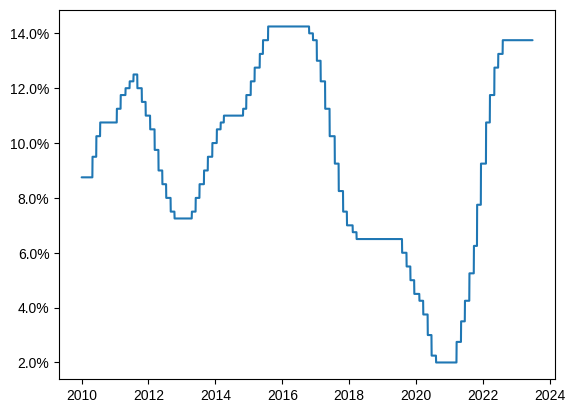

In [17]:
# PASSO 4 – Montar o Gráfico da Selic

fig, ax = plt.subplots()

plt.style.use("cyberpunk")

ax.plot(selic.index, selic ['selic'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.grid(False)
plt.savefig('selic.png', dpi = 300)

plt.show()

<Axes: xlabel='Date'>

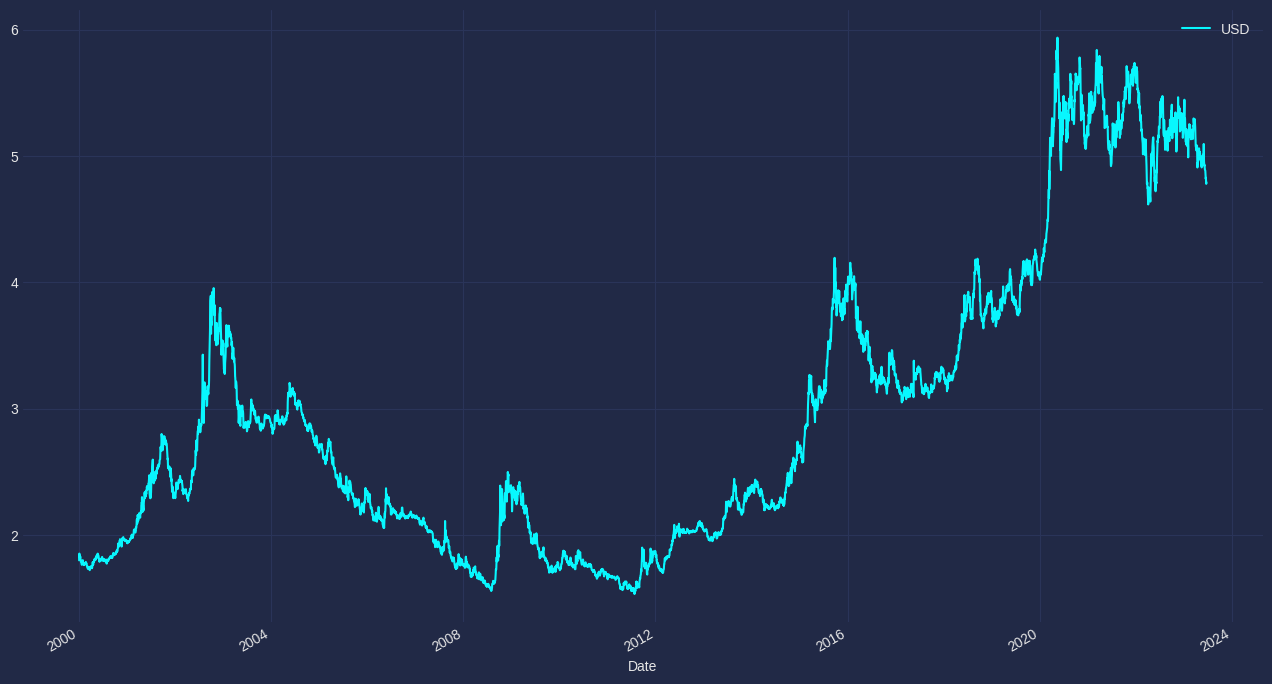

In [21]:
#SCRAPING  https://www.bcb.gov.br/conversao
# PASSO 1 – Baixando os dados das moedas
df_cambio = currency.get(['USD'], start='2000-01-01', end='2023-06-20', side='ask')

# PASSO 2 – Montar o gráfico das moedas
df_cambio.plot(figsize=(16, 9))

In [19]:
#next-piece
df = fundamentus.get_resultado()
filtro1 = df[(df.dy >0.06)]
filtro2 = df[(df.dy > 0.06) & (df.pl > 10)]

KeyboardInterrupt: ignored

In [12]:
plt.figure(figsize = (20, 6));
plt.bar(filtro.index, filtro.dy);
plt.xticks(rotation = 45);
plt.title('Ações da B3 Pagando Dividendos Acima da Taxa SELIC, com PL Abaixo de 10 e Margem EBTIDA Acima de 20%')

NameError: ignored

<Figure size 2000x600 with 0 Axes>

In [22]:
#Looking into
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 35],
        'City': ['New York', 'London', 'Sydney']}

df = pd.DataFrame(data)
print(df)

      Name  Age      City
0    Alice   25  New York
1      Bob   30    London
2  Charlie   35    Sydney


## Carteira Internacional

## Portfólio

##TIR Investimento Semente

In [ ]:
import numpy as np

# Fluxos de caixa (valores negativos representam saídas de caixa e valores positivos representam entradas de caixa)
fluxos_de_caixa = [-100000, 5000000, 12500000, 25000000, 50000000, 100000000]

# Calcular a TIR
tir = np.irr(fluxos_de_caixa)

# Imprimir o resultado
print("A Taxa Interna de Retorno (TIR) é:", tir)

<ipython-input-1-ab02a41edc59>:7: DeprecationWarning: In accordance with NEP 32, the function irr was removed from NumPy version 1.20.  A replacement for this function is available in the numpy_financial library: https://pypi.org/project/numpy-financial
  tir = np.irr(fluxos_de_caixa)


RuntimeError: ignored

## Portfólio de Startups

In [ ]:
#@title
!pip install dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 28.3 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.0
    Uninstalling Werkzeug-2.3.0:
      Successfully uninstalled Werkzeug-2.3.0


In [ ]:
#@title
# Data for the pie chart
data = [30, 40, 20, 10]

# Create a pie chart
fig, ax = plt.subplots()
wedges, texts = ax.pie(data)

# Add a white circle on top to create the donut effect
center_circle = plt.Circle((0, 0), 0.7, color='white')
ax.add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Display the chart
plt.show()


NameError: ignored

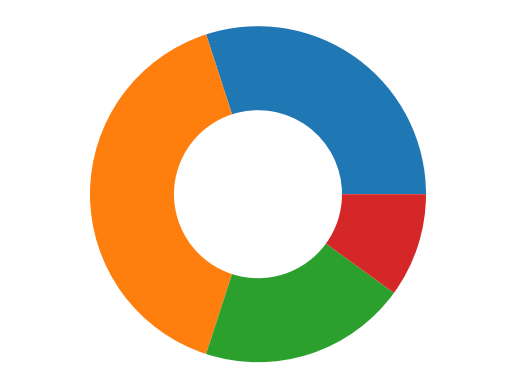

In [ ]:
#@title
import matplotlib.pyplot as plt

# Data for the pie chart
data = [30, 40, 20, 10]

# Create a pie chart with wedges of width 0.5
fig, ax = plt.subplots()
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5))

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Display the chart
plt.show()

In [ ]:
#@title
